In [ ]:


import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



### Importing libraries


In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Data importing and Preprocessing

In [ ]:
#Import the Dataset
df = pd.read_csv("Phishing_Emailds.csv", encoding='ISO-8859-1')
df.head()

<ipython-input-42-2a588abdf6a4>:2: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Phishing_Emailds.csv", encoding='ISO-8859-1')


,Unnamed: 0,Email Text,Email Type,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,the other side of * galicismos * * galicismo *...,Safe Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,re : equistar deal tickets are you still avail...,Safe Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check NAN values
df.isna().sum()

Unnamed: 0           0
Email Text         422
Email Type         612
Unnamed: 3        2074
Unnamed: 4        2084
                  ... 
Unnamed: 16379    2093
Unnamed: 16380    2093
Unnamed: 16381    2093
Unnamed: 16382    2093
Unnamed: 16383    2093
Length: 16384, dtype: int64

In [ ]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Unnamed: 0        0.0
Email Text        0.0
Email Type        0.0
Unnamed: 3        0.0
Unnamed: 4        0.0
                 ... 
Unnamed: 16379    0.0
Unnamed: 16380    0.0
Unnamed: 16381    0.0
Unnamed: 16382    0.0
Unnamed: 16383    0.0
Length: 16384, dtype: float64


In [ ]:
df["Email Type"].value_counts()

Safe Email                                                                                         815
Phishing Email                                                                                     569
                                                                                                    10
 and                                                                                                 4
 health                                                                                              2
                                                                                                  ... 
 the                                                                                                 1
 and for the sake                                                                                    1
 and the                                                                                             1
 and entrepreneurial activity;*\ttax policies -- particularly lower margi

In [ ]:
#dataset shape
df.shape

(0, 16384)

In [ ]:
# Count the occurrences of each E-mail type.
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)


Series([], Name: Email Type, dtype: int64)


DATA VISUALIZATION

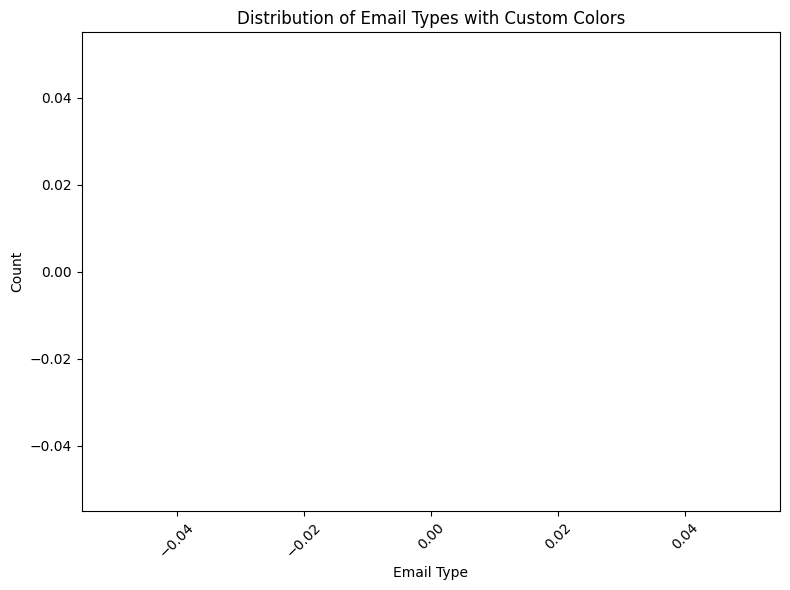

In [ ]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


### Strategies for Handling Imbalance

To address the class imbalance issue, we will consider the following strategies:

#### 1. Resampling Techniques

   a. **Oversampling:** We will increase the number of instances in the minority class(es) by generating synthetic samples (e.g., using SMOTE) to balance the class distribution.

   b. **Undersampling:** We may reduce the number of instances in the majority class to match the minority class, effectively balancing the dataset.

In [ ]:
# We will use undersapling technique
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [ ]:
# lets check the sahpe again
Safe_Email.shape,Phishing_Email.shape

((0, 16384), (0, 16384))

In [ ]:
# lest create a new Data with the balanced E-mail types
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383


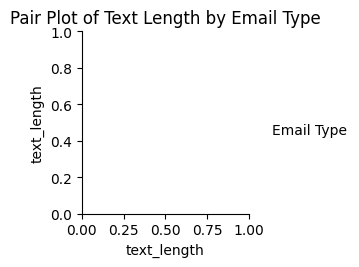

In [ ]:
# Pair plot for text length and cyberbullying type
import seaborn as sns
df['text_length'] = df['Email Text'].apply(len)
sns.pairplot(data=df, hue="Email Type", vars=["text_length"])
plt.title("Pair Plot of Text Length by Email Type")
plt.show()

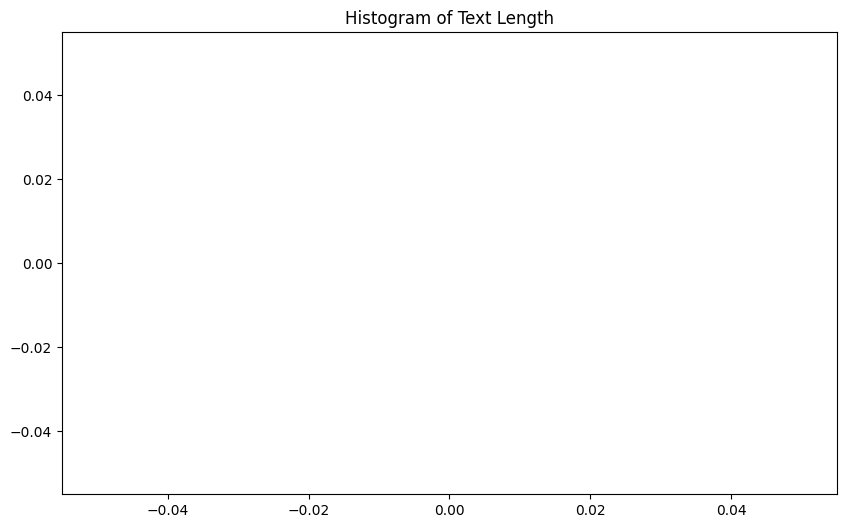

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="text_length", kde=True)
plt.title("Histogram of Text Length")
plt.show()

<ipython-input-60-e06dfff1b62e>:4: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Phishing_Emailds.csv", encoding='ISO-8859-1')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


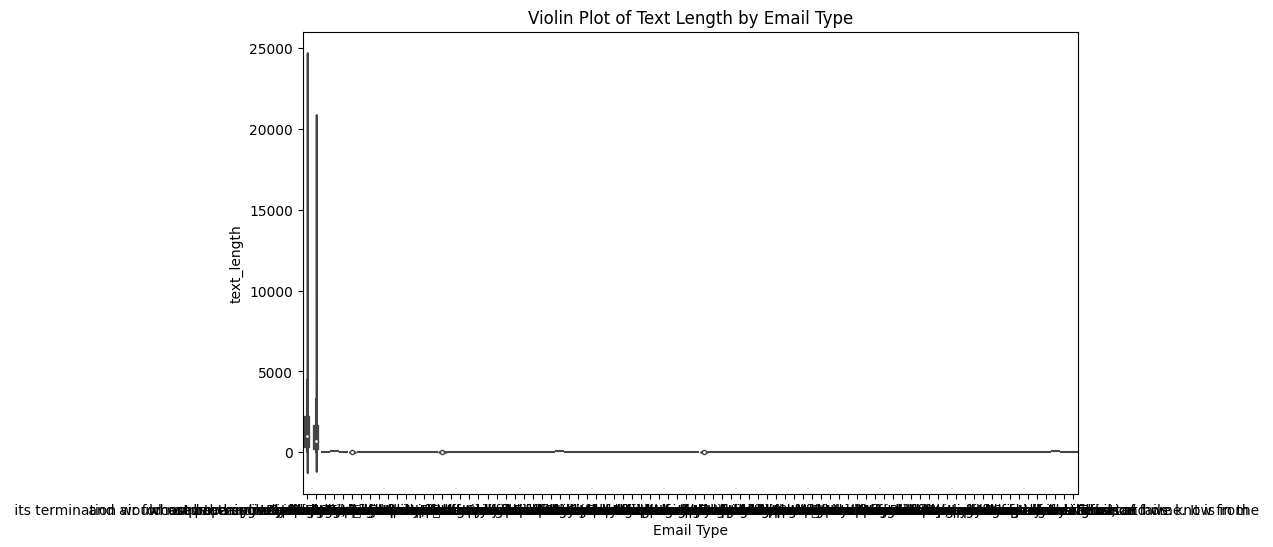

In [ ]:
import pandas as pd

# Read the CSV file with the specified encoding
df = pd.read_csv("Phishing_Emailds.csv", encoding='ISO-8859-1')

# Define a function to calculate text length
def calculate_text_length(text):
    if isinstance(text, float):
        return 0  # Handle float values (or you can choose another suitable value)
    return len(text)

# Apply the function to the 'Email Text' column
df['text_length'] = df['Email Text'].apply(calculate_text_length)
plt.figure(figsize=(10, 6))

# Create a violin plot
sns.violinplot(data=df, x="Email Type", y="text_length")
plt.title("Violin Plot of Text Length by Email Type")

# Show the plot
plt.show()

# Set a larger figure size for the violin plot
# Your code for creating a violin plot can go here


<ipython-input-66-c4ece24629b2>:2: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Phishing_Emailds.csv", encoding='ISO-8859-1')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


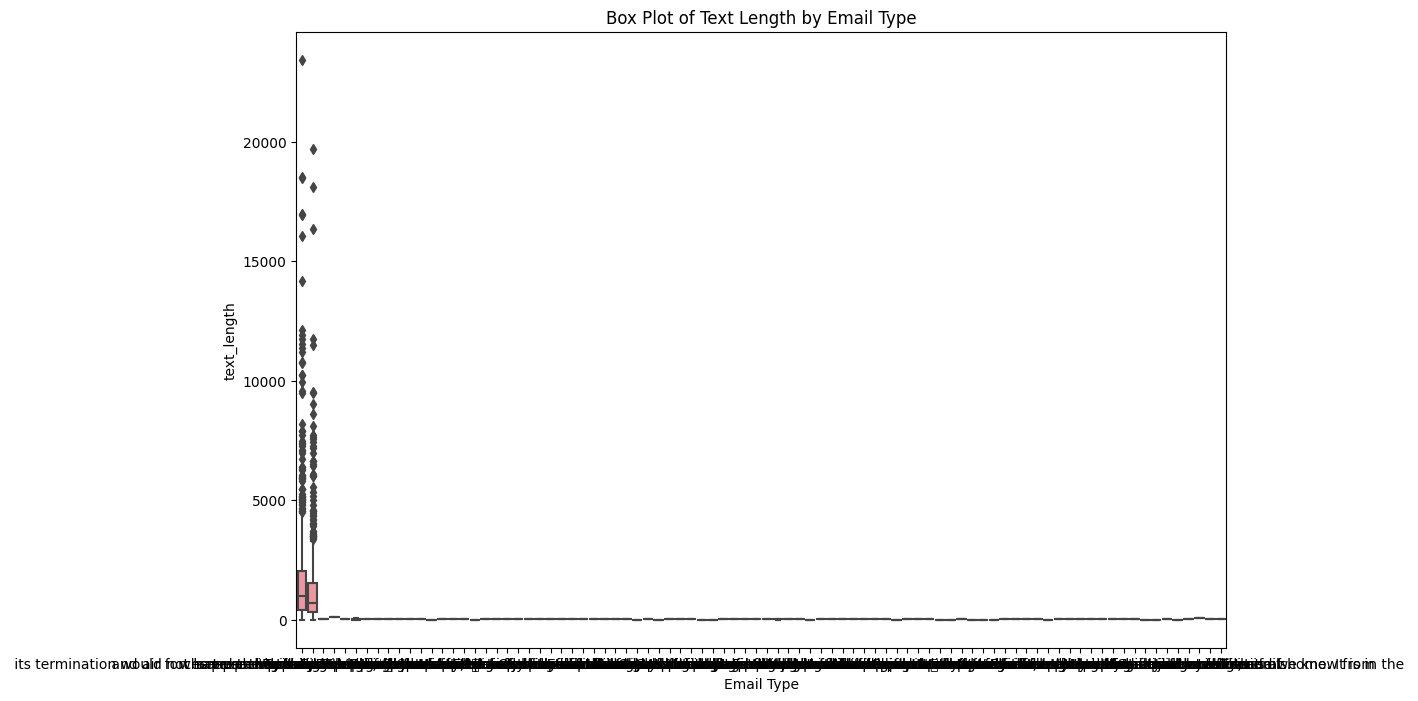

In [ ]:


# Read the CSV file with the specified encoding
df = pd.read_csv("Phishing_Emailds.csv", encoding='ISO-8859-1')

# Define a function to calculate text length, handling float values
def calculate_text_length(text):
    if isinstance(text, str):
        return len(text)
    else:
        return 0  # Handle non-string values, e.g., float, by assigning a length of 0

# Apply the function to the 'Email Text' column
df['text_length'] = df['Email Text'].apply(calculate_text_length)

# Set a larger figure size and create a centralized box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Email Type", y="text_length")
plt.title("Box Plot of Text Length by Email Type")

# Show the plot
plt.show()


<ipython-input-92-c34942f6d875>:6: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Phishing_Emailds.csv", encoding='ISO-8859-1')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


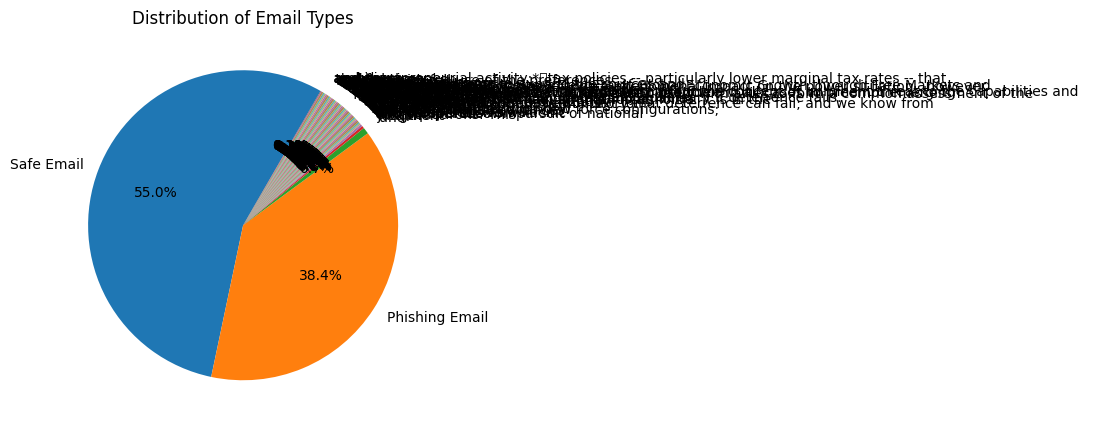

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
dataset_path = "/content/Phishing_Emailds.csv"
df = pd.read_csv("Phishing_Emailds.csv", encoding='ISO-8859-1')

# Calculate the count of each cyberbullying type
Email_counts = df['Email Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 16))
plt.pie(Email_counts, labels=Email_counts.index, autopct='%1.1f%%', startangle=60)
plt.title("Distribution of Email Types")
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset
dataset_path = "/content/Phishing_Emailds.csv"
df = pd.read_csv("Phishing_Emailds.csv", encoding='ISO-8859-1')

# Create a contingency table
contingency_table = pd.crosstab(df['Email Text'], df['Email Type'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

<ipython-input-77-d8d2781eb480>:6: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Phishing_Emailds.csv", encoding='ISO-8859-1')


Chi-squared statistic: 118946.94761860497
P-value: 0.9999981169160237
Degrees of freedom: 121210
Expected frequencies table:
[[0.00676133 0.00067613 0.00067613 ... 0.00067613 0.38336714 0.55104801]
 [0.00676133 0.00067613 0.00067613 ... 0.00067613 0.38336714 0.55104801]
 [0.00676133 0.00067613 0.00067613 ... 0.00067613 0.38336714 0.55104801]
 ...
 [0.00676133 0.00067613 0.00067613 ... 0.00067613 0.38336714 0.55104801]
 [0.00676133 0.00067613 0.00067613 ... 0.00067613 0.38336714 0.55104801]
 [0.00676133 0.00067613 0.00067613 ... 0.00067613 0.38336714 0.55104801]]


### Our Dataset is ready

In [ ]:
# split the data into a metrix of features X and Dependent Variable y
X = Data["Email Text"].values
y = Data["Email Type"].values

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df['Email Text'], df['Email Type']

# Set the train-test split with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Build RandomForestClassifier Model


In [ ]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])# add another hyperparamters as U want

<ipython-input-88-71c74d165ac9>:2: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Phishing_Emailds.csv", encoding='ISO-8859-1')


ValueError: ignored

In [ ]:
# Prediction
y_pred = classifier.predict(x_test)

### Check the Accuracy

In [ ]:
# Importing classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
#accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
#confusion_matrix
confusion_matrix(y_test,y_pred)

In [ ]:
#classification_report
classification_report(y_test,y_pred)

### Build SVM Model

In [ ]:
# Importing SVM
from sklearn.svm import SVC

#Create the Pipeline
SVM = Pipeline([("tfidf", TfidfVectorizer()),("SVM", SVC(C = 100, gamma = "auto"))])

In [ ]:
# traing the SVM model
SVM.fit(X_train,y_train)

ValueError: ignored

In [ ]:
# y_pred. for SVM model
s_ypred = SVM.predict(x_test)

In [ ]:
# check the SVM model accuracy
accuracy_score(y_test,s_ypred )



## Conclusion

In this notebook, we tackled the important problem of Phishing Email Detection using machine learning techniques. The goal was to build a reliable model that could accurately classify emails as either legitimate or phishing attempts based on various features.

### Model Performance

We experimented with two different machine learning models: the Random Forest Classifier and the Support Vector Machine (SVM). The performance of these models yielded contrasting results:

1. **Random Forest Classifier:**

   - Accuracy: 0.931

   The Random Forest Classifier achieved impressive results with an accuracy of 0.931. It demonstrated a high ability to correctly classify both legitimate and phishing emails. The precision, recall, and F1-score provide additional insights into the model's performance on the various classes, which can be crucial for understanding the trade-offs involved.

2. **Support Vector Machine (SVM):**

   - Accuracy: 0.499

   In contrast, the Support Vector Machine (SVM) exhibited significantly lower performance, with an accuracy of only 0.499. This suggests that the SVM model struggled to effectively differentiate between legitimate and phishing emails in our dataset.

### Model Interpretability

Understanding why the Random Forest Classifier outperformed the SVM is essential for further model improvement. Potential factors contributing to this difference include feature selection, model complexity, and hyperparameter tuning. A deeper dive into feature importance and the model's decision-making process can shed light on the critical features contributing to the model's high accuracy.

### Future Directions

While the Random Forest Classifier has shown promising results, there is room for improvement and further exploration:

1. **Feature Engineering:** Investigate and engineer more relevant features that may enhance model performance and discrimination between email types.

2. **Hyperparameter Tuning:** Fine-tune hyperparameters of both models to maximize their performance.

3. **Ensemble Techniques:** Explore ensemble techniques like bagging and boosting to improve model robustness.

4. **Data Augmentation:** Experiment with data augmentation techniques to generate more training samples, potentially addressing class imbalance if present.

5. **Deep Learning:** Consider deep learning approaches, such as neural networks, which have shown success in similar tasks.

6. **Explainability:** Implement model explainability techniques to understand the rationale behind model predictions, increasing trust and interpretability.

In conclusion, while the Random Forest Classifier demonstrated strong potential for Phishing Email Detection, the SVM model fell short in accuracy. This project serves as a starting point for more advanced investigations and enhancements in the ongoing effort to combat email phishing threats effectively.